# IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
# Define Data 
PATH = "data/randomforest/"
!ls {PATH}

Test.csv  Train.csv  Train.zip	Valid.csv  Valid.zip


## The Data

Data for time series analysis cannot be picked at random. Three sets are required arranged chronologically. Validation data needs to be of later date than training data. Similarly testing data needs to be the newer than validation data.
**Never randomize reading the data during training in case of time series prediction.**

- Training Data
- Validation Data
- Testing Data

In [5]:
# Lets read data into pandas frame
df_raw = pd.read_csv??

In [6]:
df_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False,
                     parse_dates=["saledate"])

In [7]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Lookng at data

pandas frame abbrevates the data while displaying. In order to look at data, we need to force pandas to show all the columns and rows. In our case we think 1000 rows and columns should be suffcient.

In [10]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

In [12]:
# Let's now examine the data
display_all(df_raw.tail().transpose())

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [13]:
# let's produce some handy stats
display_all(df_raw.describe(include='all').transpose())

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Importance of metrics used for project
In this example RMSLE (root mean square log error) of **SalesPrice** is used so we will convert.

In [14]:
df_raw['SalePrice'] = np.log(df_raw.SalePrice)

## Note: df_raw['SalePrice'] and df_raw.SalePrice are the same thing.
## But df_raw['SalePrice'] is preferred.

## First Attempt
In the first attempt we will just run a RandomForestRegressor with one tree on the data we have.

In [18]:
# Here we have created a model with just one tree 
# and we are going to run it in verbose mode.

m = RandomForestRegressor(n_jobs=1,verbose=1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [21]:
# Here we will train the model by calling .fit function. 
# Since we want to learn the SalePrice, we will drop it from the Input
m.fit(df_raw.drop('SalePrice',axis=1),df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

### Parse dates

Dates have a lot of intresting property, function **add_datepart** captures each such property and converts it into its own column. 

def add_datepart(df, fldname, drop=True):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace."""
    
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [24]:
add_datepart(df_raw,'saledate')

In [26]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

### Convert all categorical variables
We need to convert all string categories to its numeric equivalent.

def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [32]:
train_cats(df_raw)

In [33]:
m.fit(df_raw.drop('SalePrice',axis=1),df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

In [34]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

#### Convert all categories to number as well
Since RandomForests will take only numbers we need to convert categories to numbers but we also need to keep track.

proc_df(df_raw,'SalePrice') comes handy in such scenario.

In [36]:
df, y, nas = proc_df(df_raw,'SalePrice')

In [41]:
m = RandomForestRegressor(n_jobs= 10,verbose=1)
m.fit(df,y)

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   10.1s remaining:   40.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   12.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [38]:
m.score(df,y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


0.9829991404570515

#### Question of over of under fitting or over fitting

By just measuring the score, we cannot say weather this model is doing the right thing or its ending up undr or over fitting. To overcome this issue we create a validation set by splitting test samples in **training**

In [42]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [44]:
n_valid = 12000  #we take last 120000 samples as validation
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## Calculating Performance
This function is required to calculate the performance between training and validating sets.

In [87]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    """ 
    This function calculates performace between training 
    and validation sets.
    
    """
    res = [rmse(m.predict(X_train),y_train),
           rmse(m.predict(X_valid),y_valid),
           m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'): res.append(m.oob_score_)
    print("Training RMSE:%f\n Validation RMSE:%f\nTraining Accuracy:%f\nValidation Accuracy:%f\n" %(res[0],res[1],res[2],res[3]))


In [88]:
x = [0.001,100]
print("Training Accuracy:%f\n Validation Accuracy:%d\nTraining Score:%d\nValidation Score:%d\n" %(x[0],x[1],x[0],x[1]))

Training Accuracy:0.001000
 Validation Accuracy:100
Training Score:0
Validation Score:100



# Random Forest Finally

## Base Model
Base model run with default parameters which is 10 number of trees just one job.

In [89]:
m = RandomForestRegressor(n_jobs=1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 1.94 s, sys: 24 µs, total: 1.94 s
Wall time: 1.94 s
Training RMSE:0.112836
 Validation RMSE:0.373024
Training Accuracy:0.972307
Validation Accuracy:0.751502



Performance suffers badly between training and validation sets so we know there is a big case of **over fitting**

## Sampling: Speeding up the base Model

One way to avoid **overfitting** is to use only a subset of data 

In [90]:
df_trn, y_trn,nas = proc_df(df_raw,'SalePrice',subset=30000,na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

Now we strain our data and see the diffrence.

In [98]:
m = RandomForestRegressor(n_jobs= -1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 2.86 s, sys: 62 µs, total: 2.86 s
Wall time: 667 ms
Training RMSE:0.114057
 Validation RMSE:0.370511
Training Accuracy:0.971653
Validation Accuracy:0.754840



Now our validation seems to be doing better than training but diffrence between training and validation score is very large. Also validation score is well below 80%.

## Single Tree Visualization

Let's use previous subsampled data and train using a single tree. In this case peerformance will suffer but our objective is to visualize the output.

In [116]:
m = RandomForestRegressor(n_estimators=1,max_depth=3,
                          bootstrap=False,n_jobs= -1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 100 ms, sys: 16 ms, total: 116 ms
Wall time: 161 ms
Training RMSE:0.524535
 Validation RMSE:0.582234
Training Accuracy:0.400467
Validation Accuracy:0.394600



Clearly Accuracy have suffered but let's check the visualization.

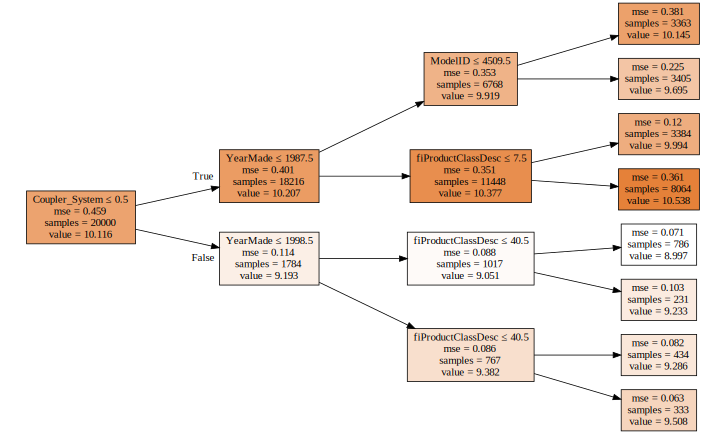

In [117]:
draw_tree(m.estimators_[0],df_trn,precision=3)

## Single Tree Full  Model
In this scenario now we remove **max_depth** parameter from the previous model and train it again.

In [119]:
m = RandomForestRegressor(n_estimators=1, n_jobs= -1, bootstrap=False)
m.fit(X_train,y_train)
print_score(m)

Training RMSE:0.000000
 Validation RMSE:0.495926
Training Accuracy:1.000000
Validation Accuracy:0.560781



Now validation is suffering because of serious overfitting. **Bagging** is used to get more generalized results.

In [ ]:
## Bagging
